In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_theme(style="white")

import matplotlib.pyplot as plt
from sklearn import preprocessing

from matplotlib.colors import LinearSegmentedColormap


## Bubble plot of top 10 percentile source nodes

<Figure size 14400x360 with 0 Axes>

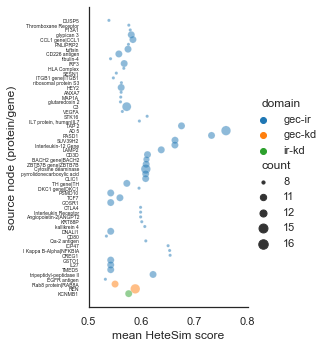

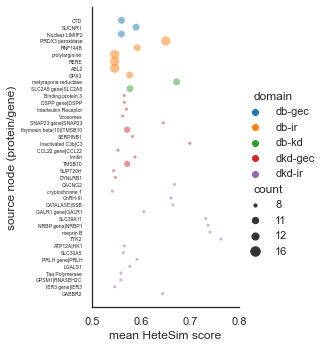

In [6]:
# Bubble plot by domains in the Top10% of source nodes across all 5 pairwise domains

df_top10 = pd.read_csv("C://Users//krutikap//OneDrive - University at Buffalo//ANFV research group//NOTES//kidney-UMLS-Krutika//Ontology mapper//TOP10_combined_triple.csv", header=0,index_col=False)

df_top10 = df_top10.sort_values(by="domain")
df_top10_set1 = df_top10[df_top10["domain"].isin(['gec-ir', 'gec-kd', 'ir-kd'])]
df_top10_set2 = df_top10[df_top10["domain"].isin(['db-gec', 'db-kd', 'db-ir', 'dkd-gec', 'dkd-ir'])]


plt.figure(figsize=(30,5)).set_figwidth(200)
ax1 = sns.relplot(x="mean_hetesim_score", y="source_name", hue="domain", size="count", sizes =(10,90), alpha=.5, palette="tab10", data=df_top10_set1)
plt.yticks(fontsize=5)
plt.xlim(0.5,0.8)
plt.xlabel("mean HeteSim score")
plt.ylabel("source node (protein/gene)")
plt.savefig("bubbleplot_bydomain(1).png", dpi=720, bbox_inches = "tight")

ax1 = sns.relplot(x="mean_hetesim_score", y="source_name", hue="domain", size="count", sizes =(10,90), alpha=.5, palette="tab10", data=df_top10_set2)
plt.yticks(fontsize=5)
plt.xlim(0.5,0.8)
plt.xlabel("mean HeteSim score")
plt.ylabel("source node (protein/gene)")
plt.savefig("bubbleplot_bydomain(2).png", dpi=720, bbox_inches = "tight")


## Top 10 percentile proteins and genes (DKD-GEC-IR domain)

In [7]:
df_triple_ap = pd.read_csv("MGI_triple_aapp.csv", header=0,index_col=False)

df_triple_gn = pd.read_csv("MGI_triple_gngm.csv", header=0,index_col=False)


### Data pre-processing

In [8]:
# --- remove duplicates
df_triple_ap = df_triple_ap.drop(["Term"], axis=1)
df_triple_ap = df_triple_ap.drop_duplicates(keep="first").reset_index(drop=True)
df_triple_gn = df_triple_gn.drop(["Term"], axis=1)
df_triple_gn = df_triple_gn.drop_duplicates(keep="first").reset_index(drop=True)
 


### Heatmap of proteins/genes and their biological ontolgies

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


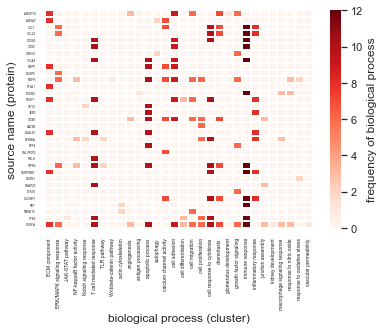

In [9]:
# Heatmap of proteins/biological ontolgies grouped by frequency of biological process

le = preprocessing.LabelEncoder()
df_triple_ap["term_label"] = le.fit_transform(df_triple_ap["term_uniID"])
df_triple_ap["term_label"] += 1
termcount = df_triple_ap["term_uniID"].value_counts()
df = pd.DataFrame(data=termcount).reset_index()
df = df.rename(columns = {"index": "TERM", "term_uniID": "TERMCOUNT"})
df_triple_ap["term_count"] = 0

for j in range(0,len(df_triple_ap)):
    for i in range(0,len(df.index)):
        if df_triple_ap["term_uniID"].iloc[j] in df["TERM"].iloc[i]:
            df_triple_ap["term_count"].iloc[j] = df["TERMCOUNT"].iloc[i]

piv = pd.pivot_table(df_triple_ap, values="term_count",index=["Input"], columns=["term_uniID"], fill_value=0, aggfunc=np.sum)

myColors = ((1.0, 1.0, 1.0), (0.0, 0.0, 0.8), (1.0, 0.0, 0.0), (0.0, 0.8, 0.0), (0.0, 0.0,0.0))
cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))

ax = sns.heatmap(piv, cmap='Reds', linecolor='white', linewidth=0.01, xticklabels=True, yticklabels=True, cbar_kws={'label': 'frequency of biological process'})

#colorbar = ax.collections[0].colorbar
#colorbar.set_ticks([0, 4, 8, 12, 16])
#colorbar.set_ticklabels(np.unique(piv))

plt.xticks(fontsize=5)
plt.yticks(fontsize=3)
plt.xlabel('biological process (cluster)')
plt.ylabel('source name (protein)')
plt.show()
# plt.savefig("heatmap_selected_CUIcount.jpg", dpi=720, bbox_inches = "tight")

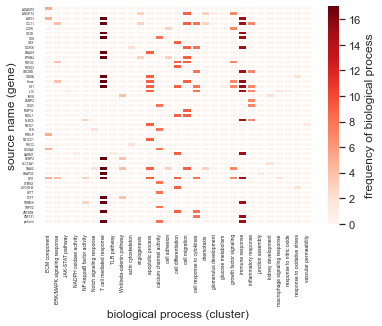

In [10]:
# Heatmap of genes/biological ontolgies grouped by frequency of biological process

le = preprocessing.LabelEncoder()
df_triple_gn["term_label"] = le.fit_transform(df_triple_gn["term_uniID"])
df_triple_gn["term_label"] += 1
termcount = df_triple_gn["term_uniID"].value_counts()
df = pd.DataFrame(data=termcount).reset_index()
df = df.rename(columns = {"index": "TERM", "term_uniID": "TERMCOUNT"})
df_triple_gn["term_count"] = 0

for j in range(0,len(df_triple_gn)):
    for i in range(0,len(df.index)):
        if df_triple_gn["term_uniID"].iloc[j] in df["TERM"].iloc[i]:
            df_triple_gn["term_count"].iloc[j] = df["TERMCOUNT"].iloc[i]

piv = pd.pivot_table(df_triple_gn, values="term_count",index=["Input"], columns=["term_uniID"], fill_value=0, aggfunc=np.sum)

myColors = ((1.0, 1.0, 1.0), (0.0, 0.0, 0.8), (1.0, 0.0, 0.0), (0.0, 0.8, 0.0), (0.0, 0.0,0.0))
cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))

ax = sns.heatmap(piv, cmap='Reds', linecolor='white', linewidth=0.01, xticklabels=True, yticklabels=True, cbar_kws={'label': 'frequency of biological process'})

#colorbar = ax.collections[0].colorbar
#colorbar.set_ticks([0, 4, 8, 12, 16])
#colorbar.set_ticklabels(np.unique(piv))

plt.xticks(fontsize=5)
plt.yticks(fontsize=3)
plt.xlabel('biological process (cluster)')
plt.ylabel('source name (gene)')
plt.show()
# plt.savefig("heatmap_selected_CUIcount.jpg", dpi=720, bbox_inches = "tight")

Text(30.5, 0.5, 'source name (protein)')

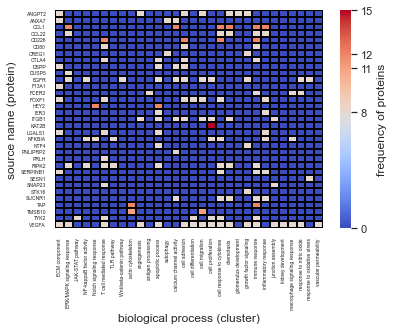

In [11]:
# Heatmap of proteins/biological ontolgies grouped by frequency of proteins

piv = pd.pivot_table(df_triple_ap, values="count",index=["Input"], columns=["term_uniID"], fill_value=0, aggfunc=np.sum)

from matplotlib.colors import LinearSegmentedColormap

myColors = ((1.0, 1.0, 1.0), (0.0, 0.0, 0.8), (1.0, 0.0, 0.0), (0.0, 0.8, 0.0), (0.0, 0.0,0.0))
cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))

ax = sns.heatmap(piv, cmap="coolwarm", linecolor='black', linewidth=0.005, xticklabels=True, yticklabels=True, cbar_kws={'label': 'frequency of proteins'})

colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0,8,11,12,15])
colorbar.set_ticklabels(['0', '8', '11', '12', '15'])


plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.xlabel('biological process (cluster)')
plt.ylabel('source name (protein)')

# plt.savefig("heatmap-triple-aapp_CUIcount.jpg", dpi=720, bbox_inches = "tight")

Text(30.5, 0.5, 'source name (gene)')

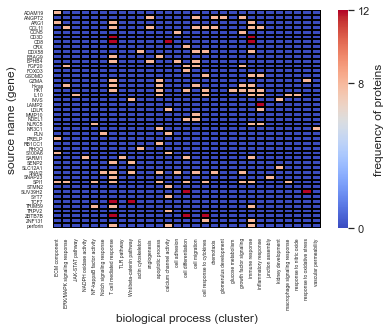

In [12]:
# Heatmap of genes/biological ontolgies grouped by frequency of genes

piv = pd.pivot_table(df_triple_gn, values="count",index=["Input"], columns=["term_uniID"], fill_value=0, aggfunc=np.sum)

from matplotlib.colors import LinearSegmentedColormap

myColors = ((1.0, 1.0, 1.0), (0.0, 0.0, 0.8), (1.0, 0.0, 0.0), (0.0, 0.8, 0.0), (0.0, 0.0,0.0))
cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))

ax = sns.heatmap(piv, cmap="coolwarm", linecolor='black', linewidth=0.005, xticklabels=True, yticklabels=True, cbar_kws={'label': 'frequency of proteins'})

colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0, 8, 12])


plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.xlabel('biological process (cluster)')
plt.ylabel('source name (gene)')
#plt.savefig("heatmap-triple-gngm_CUIcount.jpg", dpi=720, bbox_inches = "tight")

C:\Users\krutikap\AppData\Local\Temp/ipykernel_16784/1869132485.py:15: UserWarning: set_ticks() must have been called.
  colorbar.set_ticklabels(np.unique(piv))


Text(30.5, 0.5, 'source name (gene)')

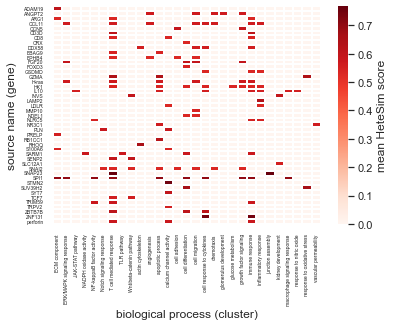

In [13]:
# Heatmap of genes/biological ontolgies grouped by mean HeteSim score

piv = pd.pivot_table(df_triple_gn, values="mean_hetesim_score",index=["Input"], columns=["term_uniID"], fill_value=0, aggfunc=np.sum)

## sepa rate colors for 4 values in color bar
myColors = ((1.0, 1.0, 1.0), (1.0, 0.0, 0.0), (0.0, 0.8, 0.0))
cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))

ax = sns.heatmap(piv, cmap ="Reds", linecolor='white', linewidth=0.005, xticklabels=True, yticklabels=True, cbar_kws={'label': 'mean HeteSim score'})
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)

colorbar = ax.collections[0].colorbar
#colorbar.set_ticks([0, 8, 12])
colorbar.set_ticklabels(np.unique(piv))

plt.xlabel('biological process (cluster)')
plt.ylabel('source name (gene)')
# plt.savefig("heatmap-triple-gngm_hetesim.png", dpi=720, bbox_inches = "tight")

C:\Users\krutikap\AppData\Local\Temp/ipykernel_16784/1492699011.py:15: UserWarning: set_ticks() must have been called.
  colorbar.set_ticklabels(np.unique(piv))


Text(30.5, 0.5, 'source name (protein)')

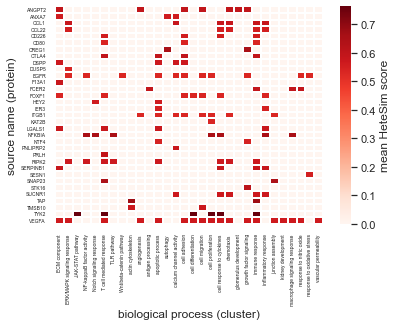

In [14]:
# Heatmap of proteins/biological ontolgies grouped by mean HeteSim score

piv = pd.pivot_table(df_triple_ap, values="mean_hetesim_score",index=["Input"], columns=["term_uniID"], fill_value=0, aggfunc=np.sum)

## sepa rate colors for 4 values in color bar
myColors = ((1.0, 1.0, 1.0), (1.0, 0.0, 0.0), (0.0, 0.8, 0.0))
cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))

ax = sns.heatmap(piv, cmap ="Reds", linecolor='white', linewidth=0.005, xticklabels=True, yticklabels=True, cbar_kws={'label': 'mean HeteSim score'})
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)

colorbar = ax.collections[0].colorbar
#colorbar.set_ticks([0, 8, 12])
colorbar.set_ticklabels(np.unique(piv))

plt.xlabel('biological process (cluster)')
plt.ylabel('source name (protein)')

# plt.savefig("heatmap-triple-aapp_hetesim.png", dpi=720, bbox_inches = "tight")